<a href="https://colab.research.google.com/github/Agurk2/covidprotease/blob/main/Protease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

     |████████████████████████████████| 6.4 MB 5.9 MB/s 
     |████████████████████████████████| 18.0 MB 603 kB/s 
     |████████████████████████████████| 238 kB 62.0 MB/s 
     |████████████████████████████████| 200 kB 86.4 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 1.6 MB 70.7 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 943 kB 39.8 MB/s 
     |████████████████████████████████| 3.6 MB 47.0 MB/s 
     |████████████████████████████████| 112 kB 71.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11771 sha256=e4d436f85e226e34ec0718d46202966338bb41d9a786280c581fb43810f77c4e
  Stored in directory: /root/.cache/pip/wheels/79/b1/3f/8cdfd5543a84705e4bd16e081f2362b9b3bfd9898d2e2d

In [ ]:
pip install quantuminspire

     |████████████████████████████████| 48 kB 2.7 MB/s 
     |████████████████████████████████| 207 kB 9.5 MB/s 
     |████████████████████████████████| 162 kB 64.1 MB/s 
  Created wheel for quantuminspire: filename=quantuminspire-1.7.0-py3-none-any.whl size=52132 sha256=ae45bcf62eedbfc71eba7e038d37406980fcdcde0f37d6b5938ec392d9f2d8fa
  Stored in directory: /root/.cache/pip/wheels/74/ec/41/80206131a3a29080f7e3ffbe2958761deaf2a2985f180c2af3
  Created wheel for coreschema: filename=coreschema-0.0.4-py3-none-any.whl size=15029 sha256=d939da556b4b785efb2286c364252beab0680ebe66e4a58ecd3a61a3445a6604
  Stored in directory: /root/.cache/pip/wheels/29/28/77/73539fe0ce161da7a571cd8278a9296adbda257406bb6f100d
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=3048e4907a0e80efa1c4edfcbdceb26d4420cacca5ac5ad0ec3d08ec1171e241
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built quantum

In [ ]:
pip install qiskit_nature

     |████████████████████████████████| 3.2 MB 5.4 MB/s 


In [ ]:
pip install PySCF

     |████████████████████████████████| 37.5 MB 323 kB/s 


In [ ]:
from getpass import getpass
from quantuminspire.qiskit import QI
from qiskit import Aer
from qiskit_nature.drivers import PySCFDriver, UnitsType, Molecule
from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.converters.second_quantization import QubitConverter

from qiskit_nature.transformers import ActiveSpaceTransformer
from qiskit_nature.algorithms import GroundStateEigensolver, BOPESSampler
from qiskit.algorithms import NumPyMinimumEigensolver

from qiskit.utils import QuantumInstance

from qiskit_nature.circuit.library.ansatzes import UCCSD
from qiskit_nature.circuit.library.initial_states import HartreeFock
from qiskit.circuit.library import TwoLocal

from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA

from functools import partial as apply_variation_to_atom_pair
import numpy as np
import matplotlib.pyplot as plt

In [46]:
variation = Molecule.absolute_stretching
specific_variation = apply_variation_to_atom_pair(variation, atom_pair=(0, 7))
toy_glutamine = Molecule(geometry=
                        [['N', [-0.7154, 0, 0]],
                         ['C', [0.7154, 0, 0,]],
                         ['H', [1.1069, 0.0916, 1.0174]],
                         ['H', [1.0996, 0.8349, -0.593]],
                         ['H', [1.0996, -0.9274, -0.4345]],
                         ['H', [-1.0625, 0.8564, 0.4294]],
                         ['H', [-1.0625, -0.7661, 0.5753]],
                         ['C', [-0.5000, 0, 0]]], # Carbon inhibitor
                          charge=0, multiplicity=1)

In [24]:
glutamine_molecule = Molecule(geometry=
                              [['O', [-2.1389, 1.637, 0.5099]],
                               ['O', [-2.6773, 0.2475, -1.1973]],
                               ['O', [2.9039, 0.2551, 1.0351]],
                               ['N', [-1.4789,  -1.8922, -0.0291]],
                               ['N', [3.2441, 0.1932, -1.2385]],
                               ['C', [0.1338, -0.2355, 0.8758]],
                               ['C', [-1.3424, -0.6086, 0.659]],
                               ['C', [1.0032,  -0.1458, -0.3839]],
                               ['C', [-2.1158, 0.4356, -0.1257]],
                               ['C', [2.4683, 0.1136, -0.1257]],
                               ['H', [0.1904, 0.7236, -0.1051]],
                               ['H', [0.5783, -0.9764, 1.4071]],
                               ['H', [-0.18319, -0.7041, 1.5545]],
                               ['H', [0.95,-1.0821, -0.9509]],
                               ['H', [0.6339, 0.6568,-1.0331]],
                               ['H', [-1.136,-1.8186,-0.9858]],
                               ['H', [-2.4648,-2.142,-0.0988]],
                               ['H', [2.856,0.078,-2.1693]],
                               ['H', [4.2414,0.3697,-1.1781]],
                               ['H', [-2.645,2.3081,0.0041]],
                               ['C', [-1.600, -1.6000, -0.0291]]], # Carbon inhibitor
                              charge=0, multiplicity=1)

In [18]:
def get_authentication():
    """Gets the authentication for connecting to the
       Quantum Inspire API.
    """
    print('Enter email:')
    email = input()
    print('Enter password')
    password = getpass()
    return email, password 

In [37]:
if __name__ == '__main__':
    if 'authentication' not in vars().keys():
        authentication = get_authentication()
    QI.set_authentication_details(*authentication)
    backend = QI.get_backend('Starmon-5')

In [40]:
def construct_hamiltonian_solve_ground_state(
    molecule,
    num_electrons=2,
    num_molecular_orbitals=2,
    chemistry_inspired=True,
    hardware_inspired_trial=None,
    vqe=True,
    perturbation_steps=np.linspace(-1, 1, 3),
):
    """Creates fermionic Hamiltonion and solves for the energy surface.

    Args:
        molecule (Union[qiskit_nature.drivers.molecule.Molecule, NoneType]): The molecule to simulate.
        num_electrons (int, optional): Number of electrons for the `ActiveSpaceTransformer`. Defaults to 2.
        num_molecular_orbitals (int, optional): Number of electron orbitals for the `ActiveSpaceTransformer`. Defaults to 2.
        chemistry_inspired (bool, optional): Whether to create a chemistry inspired trial state. `hardware_inspired_trial` must be `None` when used. Defaults to True.
        hardware_inspired_trial (QuantumCircuit, optional): The hardware inspired trial state to use. `chemistry_inspired` must be False when used. Defaults to None.
        vqe (bool, optional): Whether to use VQE to calculate the energy surface. Uses `NumPyMinimumEigensolver if False. Defaults to True.
        perturbation_steps (Union(list,numpy.ndarray), optional): The points along the degrees of freedom to evaluate, in this case a distance in angstroms. Defaults to np.linspace(-1, 1, 3).

    Raises:
        RuntimeError: `chemistry_inspired` and `hardware_inspired_trial` cannot be used together. Either `chemistry_inspired` is False or `hardware_inspired_trial` is `None`.

    Returns:
        qiskit_nature.results.BOPESSamplerResult: The surface energy as a BOPESSamplerResult object.
    """
    # Verify that `chemistry_inspired` and `hardware_inspired_trial` do not conflict
    if chemistry_inspired and hardware_inspired_trial is not None:
        raise RuntimeError(
            (
                "chemistry_inspired and hardware_inspired_trial"
                " cannot both be set. Either chemistry_inspired"
                " must be False or hardware_inspired_trial must be none."
            )
        )
        # Step 1 including refinement, passed in

    # Step 2a
    molecular_orbital_maker = PySCFDriver(
        molecule=molecule, unit=UnitsType.ANGSTROM, basis="sto3g"
    )

    # Refinement to Step 2a
    split_into_classical_and_quantum = ActiveSpaceTransformer(
        num_electrons=num_electrons, num_molecular_orbitals=num_molecular_orbitals
    )

    fermionic_hamiltonian = ElectronicStructureProblem(
        molecular_orbital_maker, [split_into_classical_and_quantum]
    )
    fermionic_hamiltonian.second_q_ops()

    # Step 2b
    map_fermions_to_qubits = QubitConverter(JordanWignerMapper())

    # Step 3a
    if chemistry_inspired:
        molecule_info = fermionic_hamiltonian.molecule_data_transformed
        num_molecular_orbitals = molecule_info.num_molecular_orbitals
        num_spin_orbitals = 2 * num_molecular_orbitals
        num_electrons_spin_up_spin_down = (
            molecule_info.num_alpha,
            molecule_info.num_beta,
        )
        initial_state = HartreeFock(
            num_spin_orbitals, num_electrons_spin_up_spin_down, map_fermions_to_qubits
        )

        chemistry_inspired_trial = UCCSD(
            map_fermions_to_qubits,
            num_electrons_spin_up_spin_down,
            num_spin_orbitals,
            initial_state=initial_state,
        )

        trial_state = chemistry_inspired_trial
    else:
      if hardware_inspired_trial:
            hardware_inspired_trial = TwoLocal(
                rotation_blocks=["ry"],
                entanglement_blocks="cz",
                entanglement="linear",
                reps=5,
            )

      trial_state = hardware_inspired_trial
    
    # Step 3b and alternative
    if vqe:
        noise_free_quantum_environment = QuantumInstance(Aer.get_backend('qasm_simulator'))
        solver = VQE(ansatz=trial_state, quantum_instance=noise_free_quantum_environment)
    else:
        solver = NumPyMinimumEigensolver()

    # Step 4 and alternative
    ground_state = GroundStateEigensolver(map_fermions_to_qubits, solver)

    # Refinement to Step 4
    energy_surface = BOPESSampler(gss=ground_state, bootstrap=False)
    energy_surface_result = energy_surface.sample(
        fermionic_hamiltonian, perturbation_steps
    )

    return energy_surface_result

In [47]:
energy_surface_result = construct_hamiltonian_solve_ground_state(toy_glutamine,
    num_electrons=2,
    num_molecular_orbitals=2,
    chemistry_inspired=False,
    hardware_inspired_trial=True,
    vqe=True,
    perturbation_steps=np.linspace(-1, 1, 4))

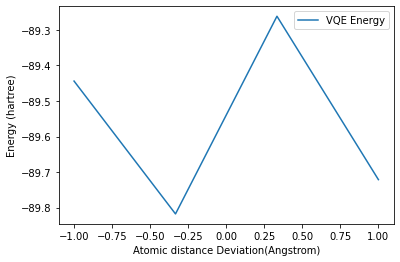

In [48]:
def plot_energy_landscape(energy_surface_result):
    if len(energy_surface_result.points) > 1:
        plt.plot(energy_surface_result.points, energy_surface_result.energies, label="VQE Energy")
        plt.xlabel('Atomic distance Deviation(Angstrom)')
        plt.ylabel('Energy (hartree)')
        plt.legend()
        plt.show()
    else:
        print("Total Energy is: ", energy_surface_result.energies[0], "hartree")
        print("(No need to plot, only one configuration calculated.)")
    
plot_energy_landscape(energy_surface_result)